In [1]:
#Data Collection & Processing
import requests
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
from selenium import webdriver
import time

api_key = '{your key}' #https://www.yelp.com/developers/documentation/v3/authentication
headers = {"Authorization": "Bearer {}".format(api_key)}

In [ ]:
#NYC 1000 best_match restauranat
#Enter any terms or location for search Ex:get_biz('NYC', 'restaurant',api_key)

def get_biz(location, term, api_key):
    headers = {'Authorization': 'Bearer %s' % api_key}
    url = 'https://api.yelp.com/v3/businesses/search'
    data = []
    for offset in range(0, 1000, 50): #Retuen number can up to 1000
        params = {
            'limit': 50, 
            'location': location.replace(' ', '+'),
            'term': term.replace(' ', '+'),
            'offset': offset
        }

        response = requests.get(url, headers=headers, params=params)
        
        if response.status_code == 200:
            data += response.json()['businesses']
        elif response.status_code == 400:
            print('400 Bad Request')
            break
    df = pd.DataFrame(data)
    return df

In [ ]:
#Save as csv
df.to_csv(r'/Users/celia/OneDrive - stevens.edu/660/Python/project/data/New.csv',index=False,header=True)

In [ ]:
#closed restaurant data from EATER
import pandas as pd
data=pd.read_csv("close_oct.csv")
data.head(5)

In [ ]:
url = data['url'].tolist()

In [ ]:
#scraping biz id
def Business_id(url):
    executable_path = '/Users/celia/OneDrive - stevens.edu/chromedriver'
    ID=[]
    for i in url:
        driver = webdriver.Chrome(executable_path=executable_path)
        driver.get(i)
        time.sleep(2)
        t = driver.find_element_by_xpath('//head/meta[42]').get_attribute('content')
        ID.append(t)
        driver.quit()
    return ID

In [ ]:
ID = Business_id(url)

In [ ]:
#Business details
def Business_detail(ID):
    headers = {"Authorization": "Bearer {}".format(api_key)}
    data=[]
    for i in ID:
        api_url = 'https://api.yelp.com/v3/businesses/{id}'.format(id=i)
        response = requests.get(api_url, headers=headers)
        d=response.json()
        data.append(d)
    df = pd.DataFrame(data)
    return df

In [ ]:
#food sub search
def food_type(ID):
    headers = {"Authorization": "Bearer {}".format(api_key)}
    food=[]
    for i in ID:
        api_url = 'https://api.yelp.com/v3/businesses/{id}'.format(id=i)
        response = requests.get(api_url, headers=headers)
        f=response.json()['categories']
        a = [y['title'] for y in f]
        food.append(a)
    return food   

In [255]:
#Date description & reviews collection
closed_data = pd.read_csv("close_data.csv")
closed_data

,Unnamed: 0,id,alias,name,image_url,is_claimed,is_closed,url,phone,display_phone,...,categories,rating,location,coordinates,photos,price,hours,transactions,special_hours,Unnamed: 20
0,0,RDpWchPc4-urvp2XJDsDKw,flight-151-new-york,Flight 151,https://s3-media2.fl.yelpcdn.com/bphoto/nJU91f...,True,True,https://www.yelp.com/biz/flight-151-new-york?a...,1.212229e+10,(212) 229-1868,...,"[{'alias': 'pubs', 'title': 'Pubs'}, {'alias':...",3.5,"{'address1': '151 8th Ave', 'address2': '', 'a...","{'latitude': 40.7421099, 'longitude': -74.00118}",['https://s3-media2.fl.yelpcdn.com/bphoto/nJU9...,$$,"[{'open': [{'is_overnight': True, 'start': '11...","['pickup', 'delivery']",NaN,NaN
1,1,0SakkRuHhECsDsZ8mRkisQ,il-triangolo-corona-3,IL Triangolo,https://s3-media1.fl.yelpcdn.com/bphoto/ObQBWZ...,True,True,https://www.yelp.com/biz/il-triangolo-corona-3...,1.718271e+10,(718) 271-1250,...,"[{'alias': 'italian', 'title': 'Italian'}]",4.5,"{'address1': '96-01 Corona Ave', 'address2': '...","{'latitude': 40.742278, 'longitude': -73.8672901}",['https://s3-media1.fl.yelpcdn.com/bphoto/ObQB...,$$,"[{'open': [{'is_overnight': False, 'start': '1...",[],NaN,NaN
2,2,frRqrd8fKuyPpsbvgaDqeA,champion-coffee-brooklyn-2,Champion Coffee,https://s3-media3.fl.yelpcdn.com/bphoto/xulnJc...,True,False,https://www.yelp.com/biz/champion-coffee-brook...,1.347987e+10,(347) 987-3851,...,"[{'alias': 'coffee', 'title': 'Coffee & Tea'}]",4.0,"{'address1': '1107 Manhattan Ave', 'address2':...","{'latitude': 40.7363055, 'longitude': -73.9554...",['https://s3-media3.fl.yelpcdn.com/bphoto/xuln...,$$,"[{'open': [{'is_overnight': False, 'start': '0...",[],NaN,NaN
3,3,fttVQZmlXuYSf9crT9XlJg,sage-kitchen-new-york,Sage Kitchen,https://s3-media2.fl.yelpcdn.com/bphoto/AOuI9o...,True,False,https://www.yelp.com/biz/sage-kitchen-new-york...,1.646581e+10,(646) 580-5126,...,"[{'alias': 'sandwiches', 'title': 'Sandwiches'...",5.0,"{'address1': '352 Bowery', 'address2': '', 'ad...","{'latitude': 40.726816, 'longitude': -73.991962}",['https://s3-media2.fl.yelpcdn.com/bphoto/AOuI...,NaN,"[{'open': [{'is_overnight': False, 'start': '1...","['pickup', 'delivery']",NaN,NaN
4,4,d7Asc4q2ImoPlA_BhfroTQ,kest√©-pizza-and-vino-new-york-5,Kest√© Pizza & Vino,https://s3-media3.fl.yelpcdn.com/bphoto/QmCGZC...,True,False,https://www.yelp.com/biz/kest%C3%A9-pizza-and-...,1.212243e+10,(212) 243-1500,...,"[{'alias': 'pizza', 'title': 'Pizza'}, {'alias...",4.0,"{'address1': '66 Gold S', 'address2': '', 'add...","{'latitude': 40.7093947, 'longitude': -74.0048...",['https://s3-media3.fl.yelpcdn.com/bphoto/QmCG...,$$,"[{'open': [{'is_overnight': False, 'start': '1...","['pickup', 'delivery']",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,297,Xs7QUN77u6LAVA-MflQR7A,woodhaven-house-rego-park-2,Woodhaven House,https://s3-media3.fl.yelpcdn.com/bphoto/2-MZs3...,True,True,https://www.yelp.com/biz/woodhaven-house-rego-...,1.718895e+10,(718) 894-5400,...,"[{'alias': 'tradamerican', 'title': 'American ...",3.5,"{'address1': '63-98 Woodhaven Blvd', 'address2...","{'latitude': 40.7218493447912, 'longitude': -7...",['https://s3-media3.fl.yelpcdn.com/bphoto/2-MZ...,$$,"[{'open': [{'is_overnight': True, 'start': '11...","['pickup', 'delivery']",NaN,NaN
298,298,fe1PZT1Fm_qpmlgiRnKuiQ,lucky-strike-new-york,Lucky Strike,https://s3-media1.fl.yelpcdn.com/bphoto/7wOkGa...,True,True,https://www.yelp.com/biz/lucky-strike-new-york...,1.212941e+10,(212) 941-0772,...,"[{'alias': 'bars', 'title': 'Bars'}, {'alias':...",3.5,"{'address1': '59 Grand St', 'address2': '', 'a...","{'latitude': 40.72216, 'longitude': -74.00348}",['https://s3-media1.fl.yelpcdn.com/bphoto/7wOk...,$$,"[{'open': [{'is_overnight': True, 'start': '12...",[],NaN,NaN
299,299,B2S5HWRfxe9G-BhKJix9Yg,pegu-club-new-york,Pegu Club,https://s3-media4.fl.yelpcdn.com/bphoto/Hwqzqr...,True,True,https://www.yelp.com/biz/pegu-club-new-york?ad...,1.212474e+10,(212) 473-7348,...,"[{'alias': 'lounges', 'title': 'Lounges'}, {'a...",

In [256]:
zipcode_list = [eval(i)['zip_code'] for i in closed_data['location']]

def zip_to_area(zipcode):
    if zipcode[:3] == '104':
        return 'Bronx'
    if zipcode[:3] == '112':
        return 'Brooklyn'
    if zipcode[:3] == '100':
        return 'Manhattan'
    if zipcode[:3] == '113'or '114' or '110' or '111':
        return 'Queens'
    if zipcode[:3] == '103':
        return 'Staten Island'
    else:
        return "Others"
    
area_list = [zip_to_area(i) for i in zipcode_list]
closed_data['area'] = area_list
closed_data

,Unnamed: 0,id,alias,name,image_url,is_claimed,is_closed,url,phone,display_phone,...,rating,location,coordinates,photos,price,hours,transactions,special_hours,Unnamed: 20,area
0,0,RDpWchPc4-urvp2XJDsDKw,flight-151-new-york,Flight 151,https://s3-media2.fl.yelpcdn.com/bphoto/nJU91f...,True,True,https://www.yelp.com/biz/flight-151-new-york?a...,1.212229e+10,(212) 229-1868,...,3.5,"{'address1': '151 8th Ave', 'address2': '', 'a...","{'latitude': 40.7421099, 'longitude': -74.00118}",['https://s3-media2.fl.yelpcdn.com/bphoto/nJU9...,$$,"[{'open': [{'is_overnight': True, 'start': '11...","['pickup', 'delivery']",NaN,NaN,Manhattan
1,1,0SakkRuHhECsDsZ8mRkisQ,il-triangolo-corona-3,IL Triangolo,https://s3-media1.fl.yelpcdn.com/bphoto/ObQBWZ...,True,True,https://www.yelp.com/biz/il-triangolo-corona-3...,1.718271e+10,(718) 271-1250,...,4.5,"{'address1': '96-01 Corona Ave', 'address2': '...","{'latitude': 40.742278, 'longitude': -73.8672901}",['https://s3-media1.fl.yelpcdn.com/bphoto/ObQB...,$$,"[{'open': [{'is_overnight': False, 'start': '1...",[],NaN,NaN,Queens
2,2,frRqrd8fKuyPpsbvgaDqeA,champion-coffee-brooklyn-2,Champion Coffee,https://s3-media3.fl.yelpcdn.com/bphoto/xulnJc...,True,False,https://www.yelp.com/biz/champion-coffee-brook...,1.347987e+10,(347) 987-3851,...,4.0,"{'address1': '1107 Manhattan Ave', 'address2':...","{'latitude': 40.7363055, 'longitude': -73.9554...",['https://s3-media3.fl.yelpcdn.com/bphoto/xuln...,$$,"[{'open': [{'is_overnight': False, 'start': '0...",[],NaN,NaN,Brooklyn
3,3,fttVQZmlXuYSf9crT9XlJg,sage-kitchen-new-york,Sage Kitchen,https://s3-media2.fl.yelpcdn.com/bphoto/AOuI9o...,True,False,https://www.yelp.com/biz/sage-kitchen-new-york...,1.646581e+10,(646) 580-5126,...,5.0,"{'address1': '352 Bowery', 'address2': '', 'ad...","{'latitude': 40.726816, 'longitude': -73.991962}",['https://s3-media2.fl.yelpcdn.com/bphoto/AOuI...,NaN,"[{'open': [{'is_overnight': False, 'start': '1...","['pickup', 'delivery']",NaN,NaN,Manhattan
4,4,d7Asc4q2ImoPlA_BhfroTQ,kest√©-pizza-and-vino-new-york-5,Kest√© Pizza & Vino,https://s3-media3.fl.yelpcdn.com/bphoto/QmCGZC...,True,False,https://www.yelp.com/biz/kest%C3%A9-pizza-and-...,1.212243e+10,(212) 243-1500,...,4.0,"{'address1': '66 Gold S', 'address2': '', 'add...","{'latitude': 40.7093947, 'longitude': -74.0048...",['https://s3-media3.fl.yelpcdn.com/bphoto/QmCG...,$$,"[{'open': [{'is_overnight': False, 'start': '1...","['pickup', 'delivery']",NaN,NaN,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,297,Xs7QUN77u6LAVA-MflQR7A,woodhaven-house-rego-park-2,Woodhaven House,https://s3-media3.fl.yelpcdn.com/bphoto/2-MZs3...,True,True,https://www.yelp.com/biz/woodhaven-house-rego-...,1.718895e+10,(718) 894-5400,...,3.5,"{'address1': '63-98 Woodhaven Blvd', 'address2...","{'latitude': 40.7218493447912, 'longitude': -7...",['https://s3-media3.fl.yelpcdn.com/bphoto/2-MZ...,$$,"[{'open': [{'is_overnight': True, 'start': '11...","['pickup', 'delivery']",NaN,NaN,Queens
298,298,fe1PZT1Fm_qpmlgiRnKuiQ,lucky-strike-new-york,Lucky Strike,https://s3-media1.fl.yelpcdn.com/bphoto/7wOkGa...,True,True,https://www.yelp.com/biz/lucky-strike-new-york...,1.212941e+10,(212) 941-0772,...,3.5,"{'address1': '59 Grand St', 'address2': '', 'a...","{'latitude': 40.72216, 'longitude': -74.00348}",['https://s3-media1.fl.yelpcdn.com/bphoto/7wOk...,$$,"[{'open': [{'is_overnight': True, 'start': '12...",[],NaN,NaN,Manhattan
299,299,B2S5HWRfxe9G-BhKJix9Yg,pegu-club-new-york,Pegu Club,https://s3-media4.fl.yelpcdn.com/bphoto/Hwqzqr...,True,True,https://www.yelp.com/biz/pegu-club-new-york?ad...,1.212474e+10,(212) 473-7348,...,4.0,"{'address1': '77 W Houston St', 'address2': ''...","{'latitude': 40.726579, 'longitude': -73.999861}",['https://s3-media4.fl.yelpcdn.com/bphoto/Hwqz...,$$$,"[{'open': [{'is_overnight': True, 'start': '17...",[],NaN,NaN,Manhattan
300,300,lsUw9oApqJUQHp9mO5sfJw,daddy-o-new-york,Daddy-O,https://s3-media3.fl.yelpcdn.com/bphoto/mDSYY5...,True,True

In [257]:
import matplotlib.mlab as mlab  
import matplotlib.pyplot as plt 

Counter({'Manhattan': 206, 'Brooklyn': 71, 'Queens': 24, 'Bronx': 1})


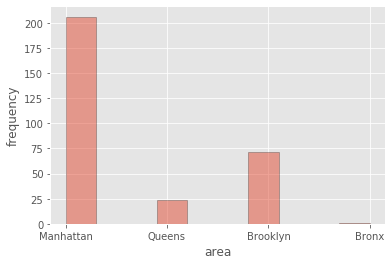

In [258]:
## area distribution of closed data
from collections import Counter
a = closed_data['area']
result = Counter(a)
print (result)

distribute = closed_data['area'].apply(str)
plt.hist(closed_data['area'],edgecolor='k', alpha=0.5)
plt.xlabel('area')
plt.ylabel('frequency')
plt.show() 

Counter({4.0: 140, 3.5: 88, 4.5: 45, 3.0: 22, 5.0: 4, 2.5: 2, 2.0: 1})


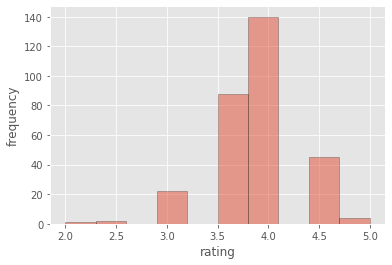

In [259]:
## Rating distribution of closed data
a = closed_data['rating']
result = Counter(a)
print (result)

rating = closed_data['rating'].apply(str)
plt.hist(closed_data['rating'],edgecolor='k', alpha=0.5)
plt.xlabel('rating')
plt.ylabel('frequency')
plt.show() 

In [ ]:
## Choose top 20% samples of each area
Brooklyn = closed_data[closed_data['area'] == 'Brooklyn']
Brooklyn_Samples = Brooklyn.iloc[0:14,:]

Manhattan = closed_data[closed_data['area'] == 'Manhattan']
Manhattan_Samples = Manhattan.iloc[0:42,:]

In [151]:
## Scrape review function
def scrape_reviews(url):
    executable_path = '/Users/ling/Desktop/2020 fall/BIA 660/project/chromedriver'
    docs=[]
    for i in url:
        data=[]
        driver = webdriver.Chrome(executable_path=executable_path)
        driver.get(i)
        time.sleep(2)
        reviews = driver.find_elements_by_css_selector('span.lemon--span__373c0__3997G.raw__373c0__3rcx7')
        for i, r in enumerate(reviews): 
            r=r.text
            data.append(r)
        for idx, line in enumerate(data):
            if len(re.findall('^Start',line))>0:
                del data[0:idx+1]                
        w= data[0:10]
        docs.append(w)
        driver.quit()
    return docs

In [143]:
##Output 10 reviews of each restaurant 
### Brooklyn(closed)
reviews_10= scrape_reviews(Brooklyn_Samples['url'])   
print(reviews_10)
Brooklyn_reviews_10 = pd.DataFrame(reviews_10, index=Brooklyn_Samples['name'],columns=range(1,11))
Brooklyn_reviews_10.to_csv('Brooklyn_reviews_10.csv')

### Manhattan(closed)
Manhattan_10= scrape_reviews(Manhattan_Samples['url'])   
print(Manhattan_10)
Manhattan_reviews_10 = pd.DataFrame(Manhattan_10, index=Manhattan_Samples['name'],columns=range(1,11))
Manhattan_reviews_10.to_csv('Manhattan_reviews_10.csv')

In [153]:
open_data = pd.read_csv("NYC1000.csv")
open_data

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance
0,RfxOtJ4SQmEeVX_XjFLWUQ,otis-brooklyn-2,Otis,https://s3-media3.fl.yelpcdn.com/bphoto/aViDty...,False,https://www.yelp.com/biz/otis-brooklyn-2?adjus...,322,"[{'alias': 'newamerican', 'title': 'American (...",5.0,"{'latitude': 40.706011, 'longitude': -73.932598}","['pickup', 'delivery']",$$,"{'address1': '18 Harrison Pl', 'address2': Non...",1.646886e+10,(646) 886-0601,5200.877004
1,FZYmp5c1VtWNfe635G_wsQ,taste-of-heaven-brooklyn,Taste of Heaven,https://s3-media3.fl.yelpcdn.com/bphoto/SNiWVU...,False,https://www.yelp.com/biz/taste-of-heaven-brook...,162,"[{'alias': 'soulfood', 'title': 'Soul Food'}]",5.0,"{'latitude': 40.717115, 'longitude': -73.940613}",['pickup'],$$,"{'address1': '251 Jackson St', 'address2': '',...",1.718576e+10,(718) 576-3146,4706.918986
2,MNNpsRXe7Wt5m3Jla9Wk0w,the-alcove-sunnyside,The Alcove,https://s3-media2.fl.yelpcdn.com/bphoto/peNqHP...,False,https://www.yelp.com/biz/the-alcove-sunnyside?...,890,"[{'alias': 'gastropubs', 'title': 'Gastropubs'...",5.0,"{'latitude': 40.7459065, 'longitude': -73.915103}",[],$$,"{'address1': '41-11 49th St', 'address2': '', ...",1.347813e+10,(347) 813-4159,8045.510108
3,VvsZAnEwU4c8Xkyrzx05Nw,anytime-new-york,Anytime,https://s3-media4.fl.yelpcdn.com/bphoto/R9NTiy...,False,https://www.yelp.com/biz/anytime-new-york?adju...,1418,"[{'alias': 'korean', 'title': 'Korean'}, {'ali...",4.5,"{'latitude': 40.74779, 'longitude': -73.98674}","['pickup', 'delivery', 'restaurant_reservation']",$$,"{'address1': '23 W 32nd St', 'address2': 'Fl 3...",1.646670e+10,(646) 669-7733,4761.966726
4,YdFFUP3-PBzBsE3j75XwaQ,panzerotti-bites-brooklyn,Panzerotti Bites,https://s3-media2.fl.yelpcdn.com/bphoto/HbRWIZ...,False,https://www.yelp.com/biz/panzerotti-bites-broo...,129,"[{'alias': 'italian', 'title': 'Italian'}]",5.0,"{'latitude': 40.683715, 'longitude': -73.99227}","['pickup', 'delivery']",$$,"{'address1': '235 Smith St', 'address2': None,...",1.718489e+10,(718) 488-9300,2421.651184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,saA0mGOJW0ZJX22-FCNYSg,capt-loui-fort-lee-2,Cap't Loui,https://s3-media2.fl.yelpcdn.com/bphoto/IRQHfo...,False,https://www.yelp.com/biz/capt-loui-fort-lee-2?...,297,"[{'alias': 'cajun', 'title': 'Cajun/Creole'}, ...",4.5,"{'latitude': 40.85116, 'longitude': -73.970674}","['pickup', 'delivery']",$$,"{'address1': '210 Main St', 'address2': None, ...",1.201462e+10,(201) 461-7080,16324.362944
996,KrJ6m_TkxBAPPSNH-G7rvQ,u-gu-brooklyn-4,U-gu,https://s3-media4.fl.yelpcdn.com/bphoto/SFjbDp...,False,https://www.yelp.com/biz/u-gu-brooklyn-4?adjus...,131,"[{'alias': 'sushi', 'title': 'Sushi Bars'}, {'...",4.5,"{'latitude': 40.69393, 'longitude': -73.96284}","['pickup', 'delivery']",$$,"{'address1': '541 Myrtle Ave', 'address2': 'St...",1.718857e+10,(718) 857-0222,2946.825652
997,VuR3lhMA80aH42jrBM_C8A,duane-park-new-york-3,Duane Park,https://s3-media4.fl.yelpcdn.com/bphoto/gRvq2i...,False,https://www.yelp.com/biz/duane-park-new-york-3...,476,"[{'alias': 'supperclubs', 'title': 'Supper Clu...",4.5,"{'latitude': 40.7249172, 'longitude': -73.9925...",['restaurant_reservation'],$$$$,"{'address1': '308 Bowery', 'address2': '', 'ad...",1.212733e+10,(212) 732-5555,2170.245444
998,-5exjWD4k8_PoIKjvjW9lA,d-and-f-italian-deli-astoria,D & F Italian Deli,https://s3-media2.fl.yelpcdn.com/bphoto/qOZXkP...,False,https://www.yelp.com/biz/d-and-f-italian-deli-...,79,"[{'alias': 'delis', 'title': 'Delis'}, {'alias...",4.5,"{'latitude': 40.76037, 'longitude': -73.92139}","['pickup', 'delivery']",$,"{'address1': '35-17 Broadway', 'address2': '',...",1.718728e+10,(718) 728-2422,8656.961559


In [163]:
zipcode_list = [eval(i)['zip_code'] for i in open_data['location']]  
area_list = [zip_to_area(i) for i in zipcode_list]
open_data['area'] = area_list
open_data

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance,area
0,RfxOtJ4SQmEeVX_XjFLWUQ,otis-brooklyn-2,Otis,https://s3-media3.fl.yelpcdn.com/bphoto/aViDty...,False,https://www.yelp.com/biz/otis-brooklyn-2?adjus...,322,"[{'alias': 'newamerican', 'title': 'American (...",5.0,"{'latitude': 40.706011, 'longitude': -73.932598}","['pickup', 'delivery']",$$,"{'address1': '18 Harrison Pl', 'address2': Non...",1.646886e+10,(646) 886-0601,5200.877004,Brooklyn
1,FZYmp5c1VtWNfe635G_wsQ,taste-of-heaven-brooklyn,Taste of Heaven,https://s3-media3.fl.yelpcdn.com/bphoto/SNiWVU...,False,https://www.yelp.com/biz/taste-of-heaven-brook...,162,"[{'alias': 'soulfood', 'title': 'Soul Food'}]",5.0,"{'latitude': 40.717115, 'longitude': -73.940613}",['pickup'],$$,"{'address1': '251 Jackson St', 'address2': '',...",1.718576e+10,(718) 576-3146,4706.918986,Brooklyn
2,MNNpsRXe7Wt5m3Jla9Wk0w,the-alcove-sunnyside,The Alcove,https://s3-media2.fl.yelpcdn.com/bphoto/peNqHP...,False,https://www.yelp.com/biz/the-alcove-sunnyside?...,890,"[{'alias': 'gastropubs', 'title': 'Gastropubs'...",5.0,"{'latitude': 40.7459065, 'longitude': -73.915103}",[],$$,"{'address1': '41-11 49th St', 'address2': '', ...",1.347813e+10,(347) 813-4159,8045.510108,Queens
3,VvsZAnEwU4c8Xkyrzx05Nw,anytime-new-york,Anytime,https://s3-media4.fl.yelpcdn.com/bphoto/R9NTiy...,False,https://www.yelp.com/biz/anytime-new-york?adju...,1418,"[{'alias': 'korean', 'title': 'Korean'}, {'ali...",4.5,"{'latitude': 40.74779, 'longitude': -73.98674}","['pickup', 'delivery', 'restaurant_reservation']",$$,"{'address1': '23 W 32nd St', 'address2': 'Fl 3...",1.646670e+10,(646) 669-7733,4761.966726,Manhattan
4,YdFFUP3-PBzBsE3j75XwaQ,panzerotti-bites-brooklyn,Panzerotti Bites,https://s3-media2.fl.yelpcdn.com/bphoto/HbRWIZ...,False,https://www.yelp.com/biz/panzerotti-bites-broo...,129,"[{'alias': 'italian', 'title': 'Italian'}]",5.0,"{'latitude': 40.683715, 'longitude': -73.99227}","['pickup', 'delivery']",$$,"{'address1': '235 Smith St', 'address2': None,...",1.718489e+10,(718) 488-9300,2421.651184,Brooklyn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,saA0mGOJW0ZJX22-FCNYSg,capt-loui-fort-lee-2,Cap't Loui,https://s3-media2.fl.yelpcdn.com/bphoto/IRQHfo...,False,https://www.yelp.com/biz/capt-loui-fort-lee-2?...,297,"[{'alias': 'cajun', 'title': 'Cajun/Creole'}, ...",4.5,"{'latitude': 40.85116, 'longitude': -73.970674}","['pickup', 'delivery']",$$,"{'address1': '210 Main St', 'address2': None, ...",1.201462e+10,(201) 461-7080,16324.362944,Queens
996,KrJ6m_TkxBAPPSNH-G7rvQ,u-gu-brooklyn-4,U-gu,https://s3-media4.fl.yelpcdn.com/bphoto/SFjbDp...,False,https://www.yelp.com/biz/u-gu-brooklyn-4?adjus...,131,"[{'alias': 'sushi', 'title': 'Sushi Bars'}, {'...",4.5,"{'latitude': 40.69393, 'longitude': -73.96284}","['pickup', 'delivery']",$$,"{'address1': '541 Myrtle Ave', 'address2': 'St...",1.718857e+10,(718) 857-0222,2946.825652,Brooklyn
997,VuR3lhMA80aH42jrBM_C8A,duane-park-new-york-3,Duane Park,https://s3-media4.fl.yelpcdn.com/bphoto/gRvq2i...,False,https://www.yelp.com/biz/duane-park-new-york-3...,476,"[{'alias': 'supperclubs', 'title': 'Supper Clu...",4.5,"{'latitude': 40.7249172, 'longitude': -73.9925...",['restaurant_reservation'],$$$$,"{'address1': '308 Bowery', 'address2': '', 'ad...",1.212733e+10,(212) 732-5555,2170.245444,Manhattan
998,-5exjWD4k8_PoIKjvjW9lA,d-and-f-italian-deli-astoria,D & F Italian Deli,https://s3-media2.fl.yelpcdn.com/bphoto/qOZXkP...,False,https://www.yelp.com/biz/d-and-f-italian-deli-...,79,"[{'alias': 'delis', 'title': 'Delis'}, {'alias...",4.5,"{'latitude': 40.76037, 'longitude': -73.92139}","['pickup', 'delivery']",$,"{'address1': '35-17 Broadway', 'address2': '',...",1.718728e+10,(718) 728-2422,8656.961559,Queens


Counter({'Manhattan': 461, 'Queens': 300, 'Brooklyn': 228, 'Bronx': 11})


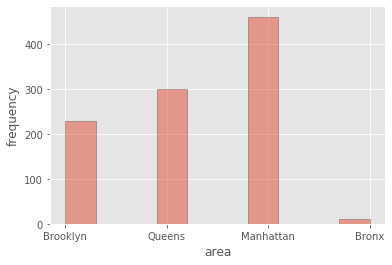

In [169]:
## area distribution
from collections import Counter
a = open_data['area']
result = Counter(a)
print (result)

distribute = open_data['area'].apply(str)
plt.hist(open_data['area'],edgecolor='k', alpha=0.5)
plt.xlabel('area')
plt.ylabel('frequency')
plt.show() 

Counter({4.5: 798, 5.0: 131, 4.0: 71})


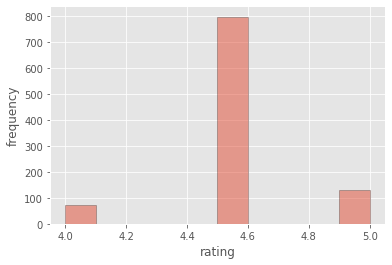

In [170]:
## rating distribution
a = open_data['rating']
result = Counter(a)
print(result)

rating = open_data['rating'].apply(str)
plt.hist(open_data['rating'],edgecolor='k', alpha=0.5)
plt.xlabel('rating')
plt.ylabel('frequency')
plt.show() 

In [176]:
## Choose top 20% samples of each area
### brooklyn(open)
Brooklyn_open = open_data[open_data['area'] == 'Brooklyn']
Brooklyn_open_sample = Brooklyn_open.iloc[0:46,:]
Brooklyn_open_sample

### Manhattan(open)
Manhattan_open = open_data[open_data['area'] == 'Manhattan']
Manhattan_open_sample = Manhattan_open.iloc[0:93,:]
Manhattan_open_sample

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance,area
0,RfxOtJ4SQmEeVX_XjFLWUQ,otis-brooklyn-2,Otis,https://s3-media3.fl.yelpcdn.com/bphoto/aViDty...,False,https://www.yelp.com/biz/otis-brooklyn-2?adjus...,322,"[{'alias': 'newamerican', 'title': 'American (...",5.0,"{'latitude': 40.706011, 'longitude': -73.932598}","['pickup', 'delivery']",$$,"{'address1': '18 Harrison Pl', 'address2': Non...",1.646886e+10,(646) 886-0601,5200.877004,Brooklyn
1,FZYmp5c1VtWNfe635G_wsQ,taste-of-heaven-brooklyn,Taste of Heaven,https://s3-media3.fl.yelpcdn.com/bphoto/SNiWVU...,False,https://www.yelp.com/biz/taste-of-heaven-brook...,162,"[{'alias': 'soulfood', 'title': 'Soul Food'}]",5.0,"{'latitude': 40.717115, 'longitude': -73.940613}",['pickup'],$$,"{'address1': '251 Jackson St', 'address2': '',...",1.718576e+10,(718) 576-3146,4706.918986,Brooklyn
4,YdFFUP3-PBzBsE3j75XwaQ,panzerotti-bites-brooklyn,Panzerotti Bites,https://s3-media2.fl.yelpcdn.com/bphoto/HbRWIZ...,False,https://www.yelp.com/biz/panzerotti-bites-broo...,129,"[{'alias': 'italian', 'title': 'Italian'}]",5.0,"{'latitude': 40.683715, 'longitude': -73.99227}","['pickup', 'delivery']",$$,"{'address1': '235 Smith St', 'address2': None,...",1.718489e+10,(718) 488-9300,2421.651184,Brooklyn
5,nSUIB7itn5ufTUzwa1IgxA,frenchys-food-truck-brooklyn,Frenchy's Food Truck,https://s3-media3.fl.yelpcdn.com/bphoto/ZH8ag-...,False,https://www.yelp.com/biz/frenchys-food-truck-b...,78,"[{'alias': 'coffee', 'title': 'Coffee & Tea'},...",5.0,"{'latitude': 40.6706988393431, 'longitude': -7...",[],$,"{'address1': '341 Eastern Pkwy', 'address2': '...",1.646468e+10,(646) 468-2861,4939.198387,Brooklyn
12,v1DHGRNCH9247WLYoaoA9A,l-industrie-pizzeria-brooklyn,L'industrie Pizzeria,https://s3-media2.fl.yelpcdn.com/bphoto/SRL_Rz...,False,https://www.yelp.com/biz/l-industrie-pizzeria-...,535,"[{'alias': 'pizza', 'title': 'Pizza'}]",4.5,"{'latitude': 40.71162, 'longitude': -73.95783}","['pickup', 'delivery']",$,"{'address1': '254 S 2nd St', 'address2': '', '...",1.718599e+10,(718) 599-0002,3145.016041,Brooklyn
17,nXoaGAhH6tNDQEE871V-ig,madame-poupon-brooklyn,Madame Poupon,https://s3-media3.fl.yelpcdn.com/bphoto/Xk3FKq...,False,https://www.yelp.com/biz/madame-poupon-brookly...,71,"[{'alias': 'french', 'title': 'French'}, {'ali...",5.0,"{'latitude': 40.6844653, 'longitude': -73.9502...",[],NaN,"{'address1': '387A Nostrand Ave', 'address2': ...",1.718929e+10,(718) 928-7472,4385.034277,Brooklyn
23,CCBy_QYHbTtPrAKHS3pqHg,pita-palace-brooklyn,Pita Palace,https://s3-media1.fl.yelpcdn.com/bphoto/oZf-LD...,False,https://www.yelp.com/biz/pita-palace-brooklyn?...,243,"[{'alias': 'mideastern', 'title': 'Middle East...",5.0,"{'latitude': 40.7172485, 'longitude': -73.9448...",[],$,"{'address1': '413 Graham Ave', 'address2': '',...",1.718383e+10,(718) 383-0550,4369.092162,Brooklyn
27,QQpQujXQGbZBK6BeAokzDA,pomp-and-circumstance-dining-williamsburg,Pomp & Circumstance Dining,https://s3-media3.fl.yelpcdn.com/bphoto/NA3v2k...,False,https://www.yelp.com/biz/pomp-and-circumstance...,70,"[{'alias': 'italian', 'title': 'Italian'}, {'a...",5.0,"{'latitude': 40.714166, 'longitude': -73.949612}","['pickup', 'delivery']",$$,"{'address1': '577 Lorimer St', 'address2': '',...",1.718387e+10,(718) 387-4861,3889.525544,Brooklyn
30,eIbKiQuExi12NcGeqMzQAw,babas-pierogies-brooklyn,Baba's Pierogies,https://s3-media1.fl.yelpcdn.com/bphoto/LpSQQD...,False,https://www.yelp.com/biz/babas-pierogies-brook...,407,"[{'alias': 'modern_european', 'title': 'Modern...",4.5,"{'latitude': 40.67687, 'longitude': -73.98633}","['pickup', 'delivery']",$$,"{'address1': '295 3rd Ave', 'address2': '', 'a...",1.718222e+10,(718) 222-0777,3253.379374,Brooklyn
31,sbbrNeGvSAUdrhcIm2MTsg,191-knickerbocker-brooklyn-3,191 Knickerbocker,https://s3-media3.fl.yelpcdn.com/bphoto/iWkAxE...,False,https://www.yelp.com/biz/191-knickerbocker-bro...,148,"[{'alias': 'comfortfood', 'title': 'Comfort Fo..."